In [1]:
import librosa
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

def extract_feature(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=1)
    return mfccs_mean

def preprocess_dataset(file_path):
    features = []
    labels = []

    for path in file_path:
        features.append(extract_feature(path))
        labels.append(0 if 'music' in path else 1)  # 0: music, 1: speech

    return np.array(features), np.array(labels)

In [2]:
music_data_path = 'data/music'
speech_data_path = 'data/speech'
file_paths = []

for file in os.listdir(music_data_path):
    file_paths.append(os.path.join(music_data_path, file))
for file in os.listdir(speech_data_path):
    file_paths.append(os.path.join(speech_data_path, file))

features, labels = preprocess_dataset(file_paths)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training samples: 102, Testing samples: 26


In [3]:
# Linear Kernel SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_linear)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.81


In [4]:
# Sigmoid Kernel SVM
model = SVC(kernel='sigmoid', random_state=42)
model.fit(X_train, y_train)

y_pred_sigmoid = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sigmoid)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.69


In [5]:
# Poly Kernel SVM
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, y_train)

y_pred_poly = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_poly)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.85


In [6]:
# RBF Kernel SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

y_pred_rbf = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rbf)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.85


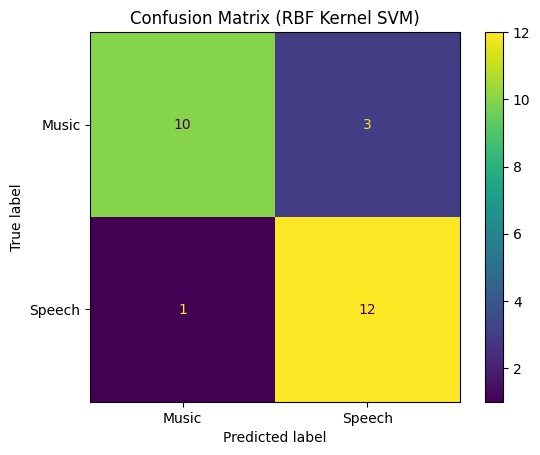

In [7]:
cm = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Music', 'Speech'])
disp.plot()
plt.title('Confusion Matrix (RBF Kernel SVM)')
plt.show()

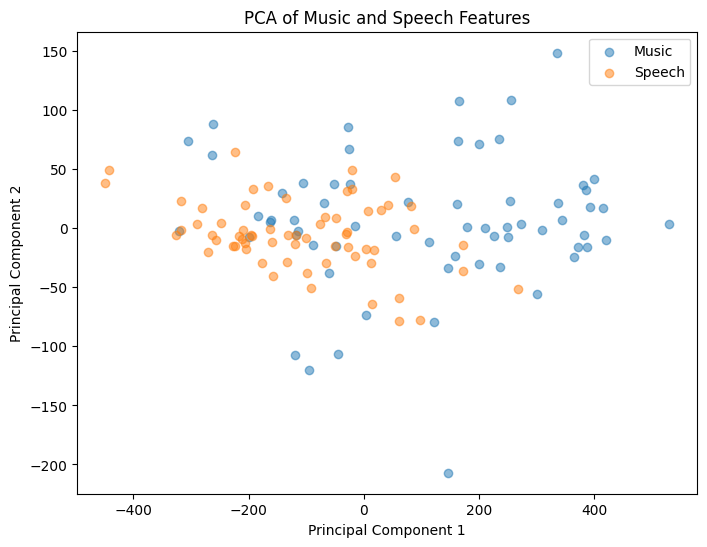

In [8]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(features)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[labels==0, 0], X_reduced[labels==0, 1], label='Music', alpha=0.5)
plt.scatter(X_reduced[labels==1, 0], X_reduced[labels==1, 1], label='Speech', alpha=0.5)
plt.title('PCA of Music and Speech Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()